In [1]:
#Declare dependences and matplot usgae
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os.path

In [2]:
#Declare locations of csv files
city_data_csv = os.path.join("Resources", "city_data.csv")
ride_data_csv = os.path.join("Resources", "ride_data.csv")

## Stage csvs and run initial checks on data quality

In [3]:
city_data_df = pd.read_csv(city_data_csv)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
ride_data_df = pd.read_csv(ride_data_csv)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
sum(city_data_df["type"]=="Urban")

66

In [10]:
sum(city_data_df["type"]=="Suburban")

36

In [11]:
sum(city_data_df["type"]=="Rural")

18

In [12]:
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [13]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [14]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [15]:
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


## Bubble plot for fare by cit and city type

### Start by segmenting data by city type

In [16]:
urban_cities_df = pyber_data_df[pyber_data_df["type"]=="Urban"]
urban_cities_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
1620,Reynoldsfurt,2019-02-14 11:25:10,39.40,9070692324754,67,Urban
1621,Christopherfurt,2019-03-13 01:47:52,32.05,2788817929605,41,Urban
1622,Raymondhaven,2019-03-20 02:20:34,38.53,8658255136559,11,Urban
1623,Port Johnbury,2019-03-26 07:22:45,7.63,8089282605778,3,Urban


In [17]:
suburban_cities_df = pyber_data_df[pyber_data_df["type"]=="Suburban"]
suburban_cities_df

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban
...,...,...,...,...,...,...
2245,West Hannah,2019-03-02 17:06:03,13.92,7388937249208,12,Suburban
2246,Lake Robertside,2019-04-03 03:27:45,12.76,1301757653884,4,Suburban
2247,Colemanland,2019-01-10 06:49:58,27.70,8704067171414,23,Suburban
2248,East Marymouth,2019-02-12 23:18:53,47.41,7409660239158,5,Suburban


In [18]:
rural_cities_df = pyber_data_df[pyber_data_df["type"]=="Rural"]
rural_cities_df

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


### Determine count of rides per city per type

In [19]:
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count

city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64

In [20]:
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count

city
Barronchester         16
Bethanyland           18
Brandonfort           19
Colemanland           22
Davidfurt             17
East Aaronbury         9
East Danielview       17
East Kentstad         13
East Marymouth        27
Grayville             15
Josephside            27
Lake Ann              12
Lake Omar             14
Lake Robertside       25
Lake Scott            18
Lewishaven            12
Lewisland             17
Mezachester           17
Myersshire            16
New Olivia            17
New Raymond           22
New Shannonberg       17
Nicolechester         19
North Jeffrey         13
North Richardhaven    14
North Timothy         15
Port Shane            19
Rodriguezview         15
Sotoville             11
South Brenda          24
South Teresa          22
Veronicaberg          17
Victoriaport          14
West Hannah           21
West Kimmouth         20
Williamsonville       14
Name: ride_id, dtype: int64

In [21]:
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count

city
Bradshawfurt         10
Garzaport             3
Harringtonfort        6
Jessicaport           6
Lake Jamie            6
Lake Latoyabury      11
Michaelberg          12
New Ryantown          6
Newtonview            4
North Holly           9
North Jaime           8
Penaborough           5
Randallchester        5
South Jennifer        7
South Marychester     8
South Saramouth       4
Taylorhaven           6
West Heather          9
Name: ride_id, dtype: int64

### Next get average fare for each city by city type

In [22]:
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare

city
Amandaburgh            24.641667
Barajasview            25.332273
Carriemouth            28.314444
Christopherfurt        24.501852
Deanville              25.842632
                         ...    
West Patrickchester    28.233125
West Robert            25.123871
West Samuelburgh       21.767600
Williamsstad           24.362174
Williamsview           26.599000
Name: fare, Length: 66, dtype: float64

In [23]:
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare

city
Barronchester         36.422500
Bethanyland           32.956111
Brandonfort           35.437368
Colemanland           30.894545
Davidfurt             31.995882
East Aaronbury        25.661111
East Danielview       31.560588
East Kentstad         29.823077
East Marymouth        30.835185
Grayville             27.763333
Josephside            32.858148
Lake Ann              30.890000
Lake Omar             28.075000
Lake Robertside       31.262000
Lake Scott            31.886111
Lewishaven            25.241667
Lewisland             34.614118
Mezachester           30.760000
Myersshire            30.203125
New Olivia            34.054118
New Raymond           27.961818
New Shannonberg       28.378235
Nicolechester         30.909474
North Jeffrey         29.242308
North Richardhaven    24.704286
North Timothy         31.262000
Port Shane            31.077895
Rodriguezview         30.745333
Sotoville             31.980000
South Brenda          33.964583
South Teresa          31.220455
Ver

In [24]:
rural_avg_fare = rural_cities_df.groupby("city").mean()["fare"]
rural_avg_fare

city
Bradshawfurt         40.064000
Garzaport            24.123333
Harringtonfort       33.470000
Jessicaport          36.013333
Lake Jamie           34.358333
Lake Latoyabury      26.061818
Michaelberg          34.997500
New Ryantown         43.278333
Newtonview           36.745000
North Holly          29.130000
North Jaime          30.802500
Penaborough          35.246000
Randallchester       29.742000
South Jennifer       35.264286
South Marychester    41.870000
South Saramouth      36.160000
Taylorhaven          42.263333
West Heather         33.890000
Name: fare, dtype: float64

### Next get average number of drivers for each city type

In [25]:
urban_driver_count = urban_cities_df.groupby("city").mean()["driver_count"]
urban_driver_count

city
Amandaburgh            12.0
Barajasview            26.0
Carriemouth            52.0
Christopherfurt        41.0
Deanville              49.0
                       ... 
West Patrickchester    25.0
West Robert            39.0
West Samuelburgh       73.0
Williamsstad           59.0
Williamsview           46.0
Name: driver_count, Length: 66, dtype: float64

In [26]:
suburban_driver_count = suburban_cities_df.groupby("city").mean()["driver_count"]
suburban_driver_count

city
Barronchester         11.0
Bethanyland           22.0
Brandonfort           10.0
Colemanland           23.0
Davidfurt             23.0
East Aaronbury         7.0
East Danielview       22.0
East Kentstad         20.0
East Marymouth         5.0
Grayville              2.0
Josephside            25.0
Lake Ann               3.0
Lake Omar             22.0
Lake Robertside        4.0
Lake Scott            23.0
Lewishaven            23.0
Lewisland              4.0
Mezachester           14.0
Myersshire            19.0
New Olivia            20.0
New Raymond           17.0
New Shannonberg       20.0
Nicolechester         19.0
North Jeffrey         11.0
North Richardhaven     1.0
North Timothy          7.0
Port Shane             7.0
Rodriguezview         20.0
Sotoville             10.0
South Brenda           1.0
South Teresa          21.0
Veronicaberg          20.0
Victoriaport          16.0
West Hannah           12.0
West Kimmouth          4.0
Williamsonville        2.0
Name: driver_count, dty

In [27]:
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count

city
Bradshawfurt         7.0
Garzaport            7.0
Harringtonfort       4.0
Jessicaport          1.0
Lake Jamie           4.0
Lake Latoyabury      2.0
Michaelberg          6.0
New Ryantown         2.0
Newtonview           1.0
North Holly          8.0
North Jaime          1.0
Penaborough          6.0
Randallchester       9.0
South Jennifer       7.0
South Marychester    1.0
South Saramouth      7.0
Taylorhaven          1.0
West Heather         4.0
Name: driver_count, dtype: float64

## Create scatter plot

### Start with individual by city type

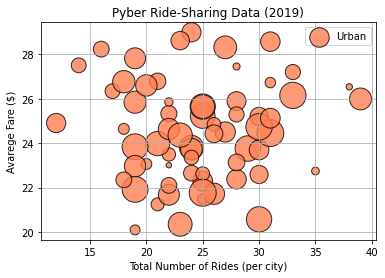

In [28]:
plt.scatter(urban_ride_count,
            urban_avg_fare,
            s=urban_driver_count*10,
            c="coral",
           edgecolor = "black",
           linewidths=1,
           alpha=0.8,
           label="Urban")
plt.title("Pyber Ride-Sharing Data (2019)")
plt.ylabel("Avarege Fare ($)")
plt.xlabel("Total Number of Rides (per city)")
plt.grid(True)
plt.legend()

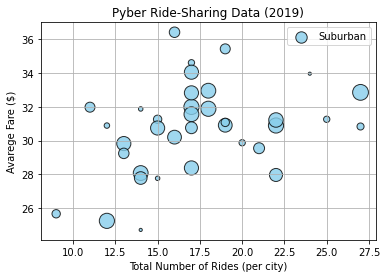

In [29]:
plt.scatter(x=suburban_ride_count,
            y=suburban_avg_fare,
            s=suburban_driver_count*10,
           c="skyblue",
           edgecolor="black",
           linewidths=1,
           alpha=0.8,
           label="Suburban")
plt.title("Pyber Ride-Sharing Data (2019)")
plt.ylabel("Avarege Fare ($)")
plt.xlabel("Total Number of Rides (per city)")
plt.grid(True)
plt.legend()

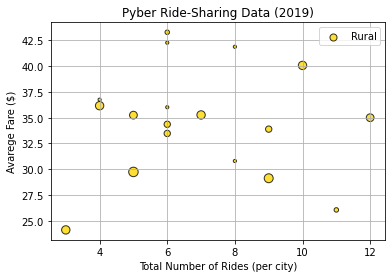

In [30]:
plt.scatter(x=rural_ride_count,
            y=rural_avg_fare,
            s=rural_driver_count*10,
            c="gold",
            edgecolor="black",
            linewidths=1,
            alpha=0.8,
            label="Rural"
           )
plt.title("Pyber Ride-Sharing Data (2019)")
plt.ylabel("Avarege Fare ($)")
plt.xlabel("Total Number of Rides (per city)")
plt.grid(True)
plt.legend()

### Combine all three city types into a single bubble chart

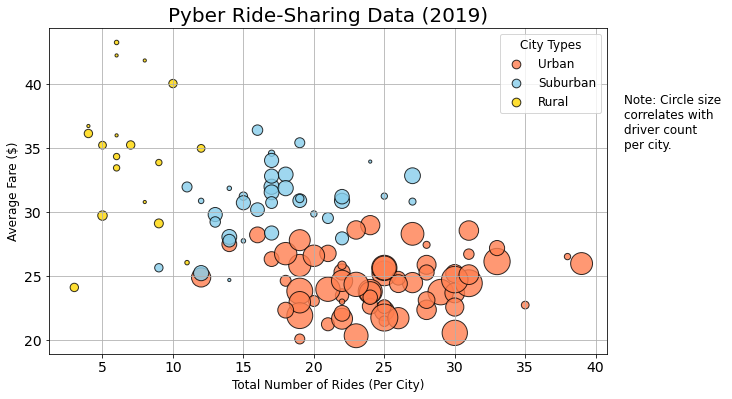

In [74]:
plt.subplots(figsize=(10,6))

plt.scatter(urban_ride_count,
            urban_avg_fare,
            s=urban_driver_count*10,
            c="coral",
           edgecolor = "black",
           linewidths=1,
           alpha=0.8,
           label="Urban")
plt.scatter(x=suburban_ride_count,
            y=suburban_avg_fare,
            s=suburban_driver_count*10,
           c="skyblue",
           edgecolor="black",
           linewidths=1,
           alpha=0.8,
           label="Suburban")
plt.scatter(x=rural_ride_count,
            y=rural_avg_fare,
            s=rural_driver_count*10,
            c="gold",
            edgecolor="black",
            linewidths=1,
            alpha=0.8,
            label="Rural"
           )

plt.title("Pyber Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Create a legend based on labels
lgnd = plt.legend(fontsize=12, mode="Expanded", scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Text label referencing circle size
plt.text(42,35,"Note: Circle size \ncorrelates with\ndriver count\nper city.",fontsize="12")

#plt.show()

plt.savefig("Analysis/Fig1.png", facecolor='white', transparent=False, bbox_inches="tight")

## Statistical analysis

### Summary statistics for each city type using describe()

In [32]:
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [33]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [34]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


### Summary statistics of city ride count

In [35]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [36]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [37]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

### Summary statistics for each city type using pandas funcs

In [38]:
# calculate mean of ride count for each city
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [39]:
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [40]:
urban_ride_count.mode()

0    22
1    25
dtype: int64

In [41]:
suburban_ride_count.mode()

0    17
dtype: int64

In [42]:
rural_ride_count.mode()

0    6
dtype: int64

### Summary statistics for each city type using numpy/scipy

In [43]:
import numpy as np
import scipy.stats as sts

In [44]:
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean number of ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median number of ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean number of ride counts for urban trips is 24.62.
The median number of ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [45]:
suburban_ride_count.value_counts()

17    7
14    4
19    3
22    3
15    3
16    2
18    2
13    2
27    2
12    2
9     1
25    1
11    1
24    1
21    1
20    1
Name: ride_id, dtype: int64

In [46]:
rural_ride_count.value_counts()

6     5
4     2
9     2
8     2
5     2
10    1
3     1
11    1
12    1
7     1
Name: ride_id, dtype: int64

### Summary statistics for fare by city type

In [47]:
urban_fares = urban_cities_df["fare"]
suburban_fares = suburban_cities_df["fare"]
rural_fares = rural_cities_df["fare"]

In [48]:
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


### Summary statistics for number of drivers by city type.

In [49]:
urban_drivers = urban_cities_df["driver_count"]

mean_urban_drivers = np.mean(urban_drivers)
print(f"Mean number of urban drivers: {mean_urban_drivers:.2f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"Median number of urban drivers: {median_urban_drivers:.2f}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"Mode of urban drivers is {mode_urban_drivers}.")

Mean number of urban drivers: 36.68.
Median number of urban drivers: 37.00.
Mode of urban drivers is ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [50]:
suburban_drivers = suburban_cities_df["driver_count"]

mean_suburban_drivers = np.mean(suburban_drivers)
print(f"Mean number of suburban drivers: {mean_suburban_drivers:.2f}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"Median number of suburban drivers: {median_suburban_drivers:.2f}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"Mode of suburban drivers is {mode_suburban_drivers}.")

Mean number of suburban drivers: 13.71.
Median number of suburban drivers: 16.00.
Mode of suburban drivers is ModeResult(mode=array([20], dtype=int64), count=array([79])).


In [51]:
rural_drivers = rural_cities_df["driver_count"]
rural_drivers

mean_rural_drivers = np.mean(rural_drivers)
print(f"Mean number of rural drivers: {mean_rural_drivers:.2f}.")

median_rural_drivers = np.median(rural_drivers)
print(f"Median number of rural drivers: {median_rural_drivers:.2f}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"Mode of rural drivers is {mode_rural_drivers}.")

Mean number of rural drivers: 4.30.
Median number of rural drivers: 4.00.
Mode of rural drivers is ModeResult(mode=array([1], dtype=int64), count=array([32])).


### Box and whisker plots of ride count data

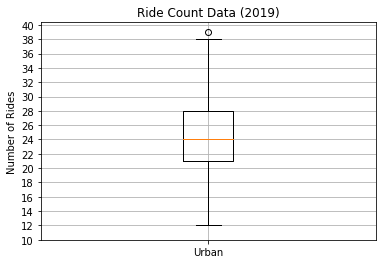

In [52]:
# start with urban cities ride count
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)

ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(10,41, step=2.0))
ax.grid()

plt.show()

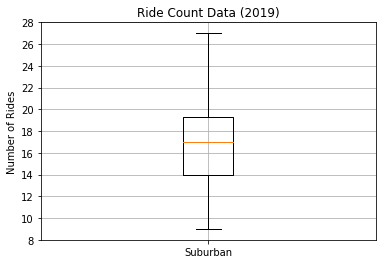

In [53]:
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)

ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(8,30,step = 2.0))
ax.grid()


plt.show()

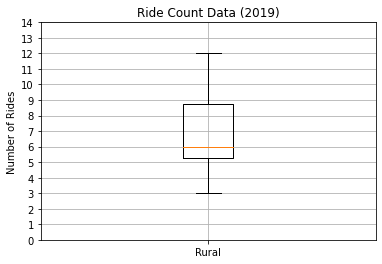

In [54]:
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)

ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(0,15))
ax.grid()

plt.show()

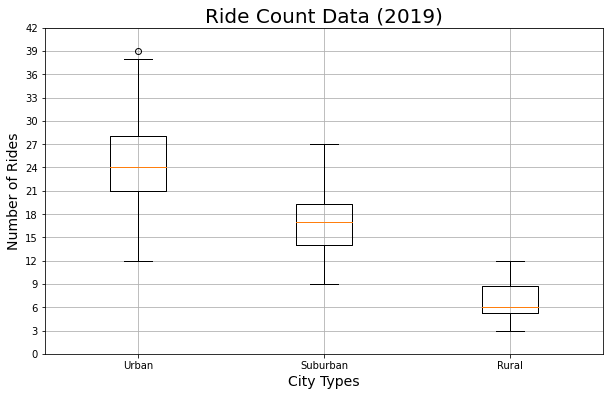

In [55]:
x_labels = ["Urban", "Suburban", "Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]

fig, ax = plt.subplots(figsize=(10,6))
ax.set_title("Ride Count Data (2019)",fontsize=20)
ax.set_ylabel("Number of Rides", fontsize=14)
ax.set_xlabel("City Types",fontsize=14)

ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0,45,step=3.0))
ax.grid()

plt.savefig("Analysis/Fig2.png", facecolor='white', transparent=False, bbox_inches="tight")
plt.show()

#### Find the outlier in the urban plot

In [56]:
urban_city_outlier = urban_ride_count[urban_ride_count == 39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


### Box and Whisper plots of fare data

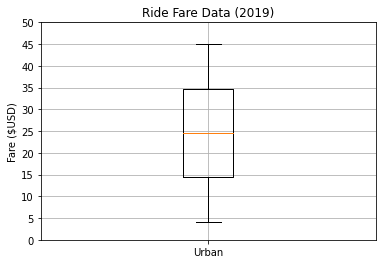

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [57]:
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)

ax.set_title("Ride Fare Data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(0,51,step=5.0))
ax.grid()

plt.show()
print("Summary Statistics")
urban_fares.describe()

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

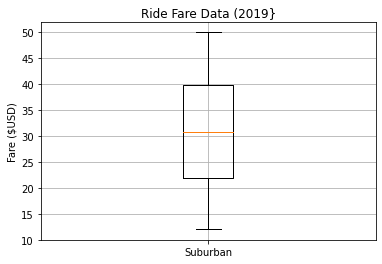

In [58]:
x_labels = ["Suburban"]
fig, ax = plt.subplots()

ax.boxplot(suburban_fares, labels=x_labels)
ax.set_title("Ride Fare Data (2019}")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(10,51,step=5.0))

ax.grid()

print("Summary Statistics")
suburban_fares.describe()

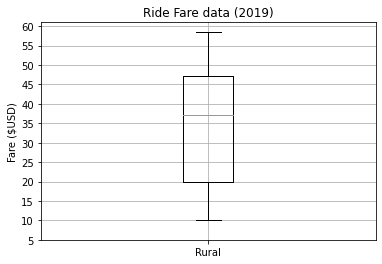

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [59]:
x_labels = ["Rural"]
fig, ax = plt.subplots()

ax.boxplot(rural_fares, labels=x_labels)
ax.set_title("Ride Fare data (2019)")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(5,65,step=5.0))
ax.grid()

plt.show()
print("Summary Statistics")
rural_fares.describe()

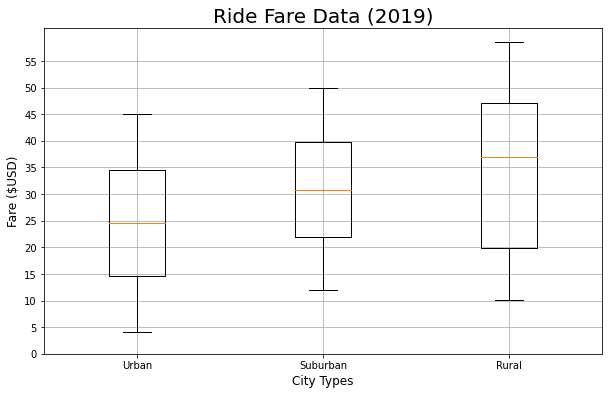

In [60]:
x_labels = ["Urban", "Suburban", "Rural"]
x_values = [urban_fares, suburban_fares, rural_fares]

fig, ax = plt.subplots(figsize = (10,6))
ax.boxplot(x_values, labels=x_labels)
ax.set_title("Ride Fare Data (2019)", fontsize=20)
ax.set_ylabel("Fare ($USD)", fontsize=12)
ax.set_xlabel("City Types", fontsize=12)

ax.set_yticks(np.arange(0,60,step=5.0))

ax.grid()

plt.savefig("Analysis/Fig3.png", facecolor='white', transparent=False, bbox_inches="tight")
plt.show()

### Box and whisker plots for driver count data

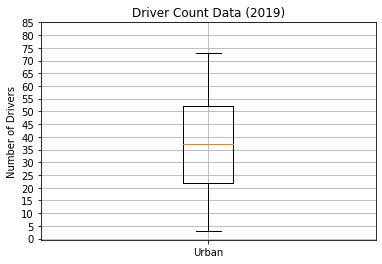

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [61]:
x_labels = ["Urban"]
fig,ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)

ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0, 90, step=5.0))

ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

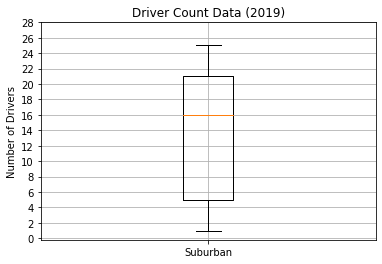

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [62]:
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers, labels=x_labels)

ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0,30,step=2.0))
ax.grid()

plt.show()
print("Summary Statistics")
suburban_drivers.describe()

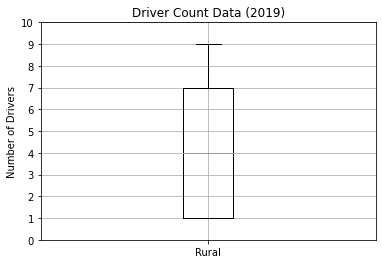

Summary statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [63]:
x_labels = ["Rural"]
fig,ax = plt.subplots()
ax.boxplot(rural_drivers,labels=x_labels)

ax.set_title("Driver Count Data (2019)")
ax.set_ylabel("Number of Drivers")
ax.set_yticks(np.arange(0,11))

plt.grid()
plt.show()
print("Summary statistics")
rural_drivers.describe()

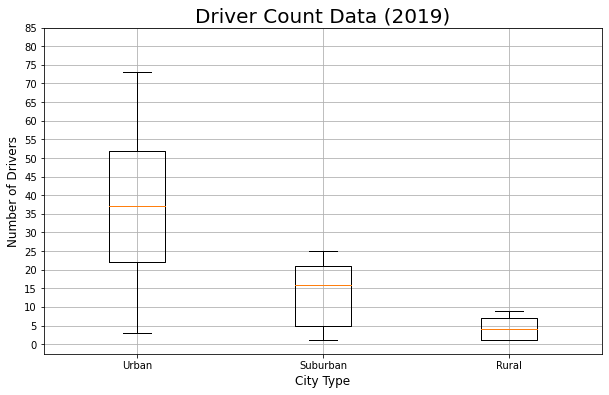

In [64]:
x_labels = ["Urban", "Suburban", "Rural"]
x_values = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10,6))

ax.boxplot(x_values, labels=x_labels)
ax.set_title("Driver Count Data (2019)", fontsize=20)
ax.set_ylabel("Number of Drivers", fontsize=12)
ax.set_xlabel("City Type", fontsize=12)
ax.set_yticks(np.arange(0,90,step=5.0))

plt.grid()
plt.savefig("Analysis/Fig4.png", facecolor='white', transparent=False, bbox_inches="tight")
plt.show()

## Percentage of fares from each city type

In [65]:
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [66]:
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [67]:
pct_fares_by_type = 100 * sum_fares_by_type / total_fares
pct_fares_by_type

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

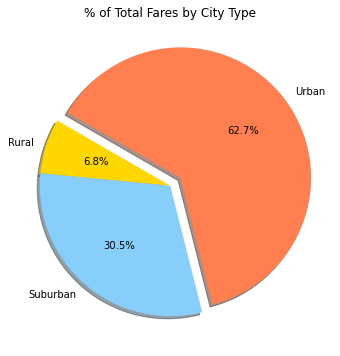

In [68]:
# Importing matplotlib to change plot configurations below
import matplotlib as mpl

plt.subplots(figsize=(10,6))
plt.pie(pct_fares_by_type,
        labels=["Rural", "Suburban", "Urban"],
        colors=["Gold", "lightskyblue", "coral"],
        explode = [0,0,0.1],
        shadow=True,
        autopct="%1.1f%%",
        startangle=150
       )
plt.title("% of Total Fares by City Type")

#use rcParams to change font size
mpl.rcParams['font.size'] = 14

plt.savefig("Analysis/Fig5.png", facecolor='white', transparent=False, bbox_inches="tight")

plt.show()

## Percentage of rides from each city type.

In [69]:
ride_percents = 100 * pyber_data_df.groupby("type").count()["ride_id"] / pyber_data_df["ride_id"].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

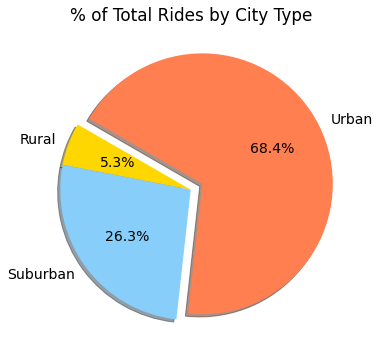

In [70]:
plt.subplots(figsize=(10,6))
plt.pie(ride_percents,
       labels=["Rural", "Suburban", "Urban"],
       colors=["gold", "lightskyblue", "coral"],
       shadow=True,
       explode=[0,0,0.1],
       autopct="%1.1f%%",
       startangle=150)
plt.title("% of Total Rides by City Type")
mpl.rcParams["font.size"] = 14

plt.savefig("Analysis/Fig6.png", facecolor='white', transparent=False, bbox_inches="tight")
plt.show()

## Percentage of total Drivers by city type.

In [71]:
driver_percents = 100 * city_data_df.groupby("type").sum()["driver_count"] / city_data_df["driver_count"].sum()
driver_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

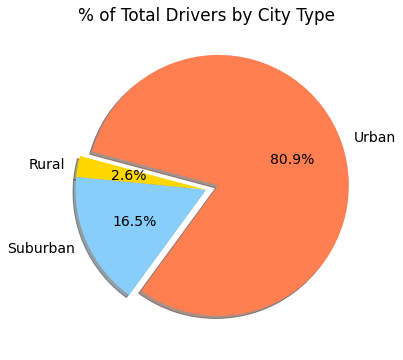

In [72]:
plt.subplots(figsize=(10,6))
plt.pie(driver_percents,
        labels=["Rural", "Suburban", "Urban"],
       colors=["gold","lightskyblue","coral"],
       shadow=True,
       explode=[0,0,0.1],
        autopct="%1.1f%%",
       startangle=165)
plt.title("% of Total Drivers by City Type")

mpl.rcParams['font.size'] = 14

plt.savefig("Analysis/Fig7.png", facecolor='white', transparent=False, bbox_inches="tight")

plt.show()